In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('OrdinalDrop1.csv')
ordinal.shape

(2579, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2579, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### Without Passthrough

In [6]:
stacking_regressor2 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [7]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f8b3834c580>)],
                  final_estimator=Ridge())

In [8]:
stacking_regressor2.score(X,y)

0.991386843932629

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f8b3834c580>)],
                  final_estimator=Ridge())

In [11]:
stacking_regressor4.score(X,y)

0.9916391698950464

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([10.99172497, 10.16777277, 10.20601106, 10.03484702, 10.25959516]),
 'score_time': array([0.00613308, 0.00691891, 0.00683808, 0.00788927, 0.00815797]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f8b3856a0a0>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f8b189ed370>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f8b3857b2e0>)],
                    final_estimator=Ridge()),
  StackingRegressor(c

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,5.814915,0.018116,0.931308
1,6.991118,0.021858,0.946897
2,5.968503,0.008336,0.946280
3,5.932342,0.025728,0.911824
4,6.052816,0.020657,0.949900
5,5.990652,0.023738,0.933133
6,6.124921,0.023859,0.929582
7,6.198771,0.025413,0.926053
8,7.772216,0.007082,0.950737
9,4.057318,0.005235,0.939564


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,47.988575,0.025084,0.930839
1,33.655950,0.014564,0.948241
2,43.367605,0.015133,0.946723
3,44.696089,0.041609,0.910793
4,43.388570,0.069016,0.949435
5,32.177786,0.014190,0.930138
6,32.866850,0.016043,0.929153
7,47.514086,0.017563,0.927397
8,32.184791,0.016701,0.951291
9,35.617093,0.042533,0.940218


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.930839
1,0.948241
2,0.946723
3,0.910793
4,0.949435
5,0.930138
6,0.929153
7,0.927397
8,0.951291
9,0.940218


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.931308,0.930839
1,0.946897,0.948241
2,0.946280,0.946723
3,0.911824,0.910793
4,0.949900,0.949435
5,0.933133,0.930138
6,0.929582,0.929153
7,0.926053,0.927397
8,0.950737,0.951291
9,0.939564,0.940218


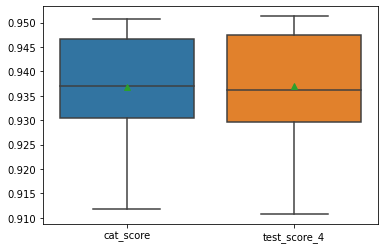

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.936878,0.936926
std,0.011131,0.011730
min,0.911824,0.910793
25%,0.930445,0.929645
50%,0.936986,0.936166
75%,0.946589,0.947482
max,0.950737,0.951291
